# Assignment 1 (BQ)3

#### 1. Download dataset using following command

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 2. Check the size and plot the images

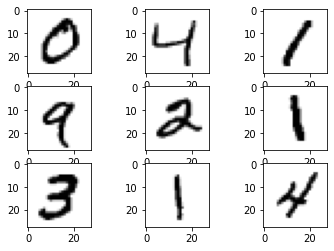

In [2]:
import matplotlib.pyplot as plt
for i in range(1, 10):
    digit = x_train[i]
    plt.subplot(3, 3, i)
    plt.imshow(digit,cmap= plt.cm.binary)
plt.show()


In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [4]:
print("Total Train Images: ",len(x_train))
print("Total Train Labels: ",len(y_train))
print("Total Train Images: ",len(x_test))
print("Total Train Labels: ",len(y_test))    

Total Train Images:  60000
Total Train Labels:  60000
Total Train Images:  10000
Total Train Labels:  10000


In [5]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
print(x_train.shape)
print(x_train.dtype)
print(x_train.ndim)

(60000, 28, 28)
uint8
3


In [18]:
# Normalization and Float conversion
x_train = x_train /255
x_test = x_test / 255 

print(x_train.shape)
print(x_train.dtype)
print(x_train.ndim)
input_shape = x_train.shape

(60000, 28, 28)
float64
3


In [20]:
# Reshaping the input
x_train_flattened = x_train.reshape(len(x_train), 28,28,1)
x_test_flattened = x_test.reshape(len(x_test), 28,28,1)

In [21]:
(y_train.shape)

(60000,)

In [25]:
# Defining model architecture
from tensorflow import keras
from tensorflow.keras import layers,models
num_classes = 10

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 59998, 26, 64)     16192     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29999, 13, 64)     0         
_________________________________________________________________
dense_3 (Dense)              (None, 29999, 13, 10)     650       
Total params: 16,842
Trainable params: 16,842
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [27]:
history = model.fit(
    x_train_flattened, y_train, 
    epochs=5, 
    validation_data=(x_test_flattened, y_test)
)

Epoch 1/5


ValueError: in user code:

    C:\Users\asif1\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\asif1\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\asif1\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\asif1\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\asif1\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\asif1\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\asif1\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\asif1\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\asif1\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 28 but received input with shape (32, 28, 28, 1)


In [14]:
loss, accuracy = model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 945us/step - loss: 2.2972 - accuracy: 0.1135


In [16]:
import numpy as np
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [17]:
print(f'Accuracy = {accuracy} Loss = {loss}')

Accuracy = 0.11349999904632568 Loss = 2.2971909046173096


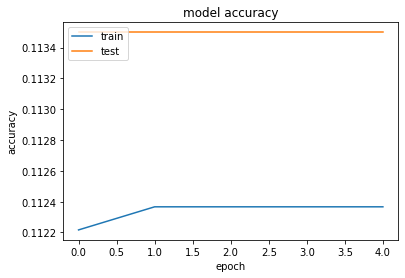

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

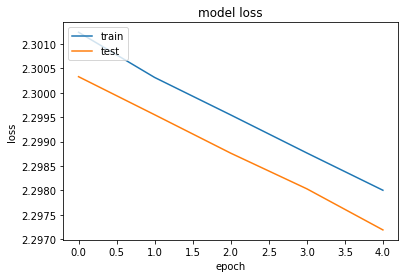

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [22]:
# Preparing a new model
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")

])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train_flattened, y_train, 
    epochs=5, 
    validation_data=(x_test_flattened, y_test),
    batch_size=256
)

loss, accuracy = model.evaluate(x_test_flattened, y_test)

y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]


print(f'Accuracy = {accuracy} Loss = {loss}')

Epoch 1/5
235/235 [==============================] - 3s 8ms/step - loss: 2.3021 - accuracy: 0.1074 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/5
235/235 [==============================] - 2s 7ms/step - loss: 2.3017 - accuracy: 0.1111 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/5
235/235 [==============================] - 2s 6ms/step - loss: 2.3010 - accuracy: 0.1121 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/5
235/235 [==============================] - 2s 6ms/step - loss: 2.3015 - accuracy: 0.1116 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 2.3010 - accuracy: 0.1135
Accuracy = 0.11349999904632568 Loss = 2.300978422164917


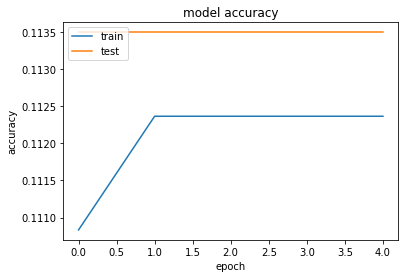

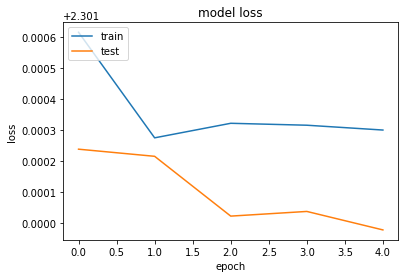

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
model = keras.Sequential([
    keras.layers.Conv1D(32, (3, 3), activation='relu',input_shape=input_shape),
    keras.layers.MaxPooling1D((2, 2)),
    keras.layers.Conv1D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling1D((2, 2)),
    keras.layers.Conv1D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling1D((2, 2)),
    keras.layers.Conv1D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling1D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5)  ,
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")

])

model.compile(loss='categorical_crossentropy',
               optimizer=optimizers.RMSprop(lr=1e-4),
               metrics=['accuracy'])

history = model.fit(
    x_train_flattened, y_train, 
    epochs=5, 
    validation_data=(x_test_flattened, y_test),
    batch_size=256
)

loss, accuracy = model.evaluate(x_test_flattened, y_test)

y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]


print(f'Accuracy = {accuracy} Loss = {loss}')

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ValueError: The `kernel_size` argument must be a tuple of 1 integers. Received: (3, 3)

In [28]:
print(x_test_flattened, y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [7 2 1 ... 4 5 6]


In [29]:
print(y_test.ndim)

1


In [30]:
print(y_test.shape)

(10000,)


In [31]:
print(y_test.dtype)

uint8
